# In this notebook, we will (FINALLY) merge our crm and bo data. And then, we will build a sales prediction model 

# Merging datasets

In [205]:
# importing libraries I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [207]:
# Importing datasets
bo_clean = pd.read_csv('bo_clean.csv')
bo_for_tableau = pd.read_csv('bo_for_tableau.csv')
jobs_clean = pd.read_csv('crm_jobs_clean.csv')
jobs_for_tableau = pd.read_csv('crm_jobs_for_tableau.csv')

In [208]:
# Merging datasets for model prediction purpose :
merge_for_prediction = pd.merge(left = jobs_clean, right = bo_clean, how = 'left', left_on = "bo_job_id", right_on= "ignition_id")        

display(merge_for_prediction.shape)
merge_for_prediction.head()

(3731, 62)

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,23.0,2.0,1.0,3.0,0.0,2.2,1.0,37.0,0.0,0.0,1.0,546.0,757.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,2425.0,764.0,25.0,3.0,0.2,9.0
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,52.0,0.0,0.0,1.0,820.0,982.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,3060.0,992.0,0.0,1.2,0.0,2.6
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,2.0,1.0,3.0,0.0,60.0,0.0,0.0,0.0,629.0,746.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,1862.0,753.0,10.0,1.0,0.2,4.0
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,3.6,0.0,1.0,2.4,1.0,37.8,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,135.0,59.0,51.0,1.4,0.4,5.0
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,4.0,0.0,1.0,2.2,1.0,52.0,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2123.0,12237.0,9.000825e+09,7.398558e+09,1.0,7.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,137.0,59.0,51.0,1.4,0.2,5.0


In [209]:
# Merging datasets for model prediction purpose :
merge_for_tableau = pd.merge(left = jobs_for_tableau, right = bo_for_tableau, how = 'left', left_on = "bo_job_id", right_on= "ignition_id")        

display(merge_for_tableau.shape)
merge_for_tableau.head()

(3731, 62)

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,NaN,NaN,Croissance / Growth,Bonne / Good,Offline Sources,25%,Non,Très importante (canaux internes / autres cabi...,Jeanne Patfoort,Senior : 6 years and more,Marketing,Les MéMER,La boîte attire difficilement nos profils,NaN,Repeat,Head of Growth,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,5260443686,Roadstr,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,Roadstr - Head of Acquisition,Roadstr,Jeanne Patfoort,Senior : 6 to 9 years,NaN,Mobilité / Transport
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,France,Hot,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Agathe Benoit,Junior : 0 to 2 years,Sales,Les Merines,"La boîte est ""sexy"" et attire facilement les c...",Lead Entrant (via formulaire marketing) / Inbo...,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,6334048617,Yavin,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,Yavin - Inside Sales,Yavin,Agathe Benoit,NaN,NaN,NaN
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,France,Tiède,Compétences / Competencies,Bonne / Good,Offline Sources,25%,Non,Aucune / None,Chloé Marchand,Junior : 0 to 2 years,Marketing,Les Merines,"La boîte est ""sexy"" et attire facilement les c...",Prospection - cold call ou réseau perso / Pros...,New,Traffic Manager / Acquisition (SEA) Manager,Bonne / Good,Best case,Attendront d'avoir le bon candidat / Will wait...,5824622674,Reglo,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,Marketing Manager,Reglo,Chloé Marchand,Junior : 0 to 2 years,NaN,Food / Boisson
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,International,NaN,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Junior : 0 to 2 years,NaN,International,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,NaN,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,7398557579,Amenitiz,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,Amenitiz - IT SDR,Amenitiz,Vera Cunha,NaN,NaN,NaN
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,International,NaN,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Junior : 0 to 2 years,Sales,International,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pou

In [210]:
# Exporting to CSV to be able to use this dataframe on Tableau :
merge_for_tableau.to_csv('merge_for_tableau.csv')

# Final data cleaning before building our prediction model

In [211]:
merge_for_prediction.head()

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,23.0,2.0,1.0,3.0,0.0,2.2,1.0,37.0,0.0,0.0,1.0,546.0,757.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,2425.0,764.0,25.0,3.0,0.2,9.0
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,52.0,0.0,0.0,1.0,820.0,982.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,3060.0,992.0,0.0,1.2,0.0,2.6
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,2.0,1.0,3.0,0.0,60.0,0.0,0.0,0.0,629.0,746.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,1862.0,753.0,10.0,1.0,0.2,4.0
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,3.6,0.0,1.0,2.4,1.0,37.8,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,135.0,59.0,51.0,1.4,0.4,5.0
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,4.0,0.0,1.0,2.2,1.0,52.0,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2123.0,12237.0,9.000825e+09,7.398558e+09,1.0,7.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,137.0,59.0,51.0,1.4,0.2,5.0


In [212]:
# There are many columns which would have a bad impact on prediction model. We need to drop them :
merge_for_prediction = merge_for_prediction.drop(['Unnamed: 0_x', 'deal_id', 'bo_job_id', 'deal_owner', 'métier', 
                                                 'associated_company_id', 'associated_company', 'Unnamed: 0_y',
                                                 'ignition_id', 'hubspot_id', 'company_hubspot_id', 'job_title', 
                                                 'company_name', 'ignition_owner_name'], axis = 1)

In [213]:
merge_for_prediction.shape

(3731, 48)

In [214]:
merge_for_prediction.isna().sum()

number_of_times_contacted                      0
number_of_sales_activities                     0
forecast_amount                                0
_%_du_contract                                 0
score_prévisionnel_de_l_opport                 0
number_of_associated_contacts                  0
weighted_amount                                0
deal_probability                               0
amount                                         0
pays                                           0
tiering                                        0
croissance                                     0
réactivité_du_client                           0
original_source_type                           0
_%_du_contract.1                               0
remplacement                                   0
concurrence_sur_le_poste_?                     0
nombre_d_années_d_expériences                  0
catégorie_métier_du_job                        0
hubspot_team                                   0
la_boîte_attire-t-el

In [215]:
# Let's drop the rows with NA's (it corresponds to the difference of number or rows on our merged dataframes)
merge_for_prediction = merge_for_prediction[(merge_for_prediction['pitch_validated'].isna()==False) & 
                                            (merge_for_prediction['nb_match_proposed'].isna()==False) &
                                            (merge_for_prediction['nb_match_to_pitch'].isna()==False) &
                                            (merge_for_prediction['nb_match_pitched'].isna()==False) &
                                            (merge_for_prediction['nb_match_interview'].isna()==False) &
                                            (merge_for_prediction['nb_match_offer'].isna()==False) &
                                            (merge_for_prediction['nb_match_hired'].isna()==False) &
                                            (merge_for_prediction['salary_estimated'].isna()==False) &
                                            (merge_for_prediction['month_created_bo'].isna()==False) &
                                            (merge_for_prediction['weekday_created_bo'].isna()==False) &
                                            (merge_for_prediction['year_created_bo'].isna()==False) &
                                            (merge_for_prediction['experience_min_wanted'].isna()==False) &
                                            (merge_for_prediction['potential_manager'].isna()==False) &
                                            (merge_for_prediction['company_market_type'].isna()==False)]

merge_for_prediction.isna().sum()

number_of_times_contacted                     0
number_of_sales_activities                    0
forecast_amount                               0
_%_du_contract                                0
score_prévisionnel_de_l_opport                0
number_of_associated_contacts                 0
weighted_amount                               0
deal_probability                              0
amount                                        0
pays                                          0
tiering                                       0
croissance                                    0
réactivité_du_client                          0
original_source_type                          0
_%_du_contract.1                              0
remplacement                                  0
concurrence_sur_le_poste_?                    0
nombre_d_années_d_expériences                 0
catégorie_métier_du_job                       0
hubspot_team                                  0
la_boîte_attire-t-elle_nos_candidats_?  

In [216]:
merge_for_prediction.shape

(3703, 48)

# Exploratory analysis : distribution, correlation, and class imbalance

In [217]:
# Let's check unique values for numericals using a loop :
for col in merge_for_prediction.columns :
    print("The number of unique values for",col, "is :", merge_for_prediction[col].nunique())

The number of unique values for number_of_times_contacted is : 231
The number of unique values for number_of_sales_activities is : 322
The number of unique values for forecast_amount is : 441
The number of unique values for _%_du_contract is : 46
The number of unique values for score_prévisionnel_de_l_opport is : 5
The number of unique values for number_of_associated_contacts is : 6
The number of unique values for weighted_amount is : 469
The number of unique values for deal_probability is : 4
The number of unique values for amount is : 491
The number of unique values for pays is : 6
The number of unique values for tiering is : 11
The number of unique values for croissance is : 6
The number of unique values for réactivité_du_client is : 6
The number of unique values for original_source_type is : 3
The number of unique values for _%_du_contract.1 is : 2
The number of unique values for remplacement is : 5
The number of unique values for concurrence_sur_le_poste_? is : 6
The number of uni

In [218]:
# Splitting between discrete and continuous variables :
def split_dataframe(df, number_uniques = 50) : 
    df2 = df.copy()
    continuous_list = []
    discrete_list = []
    for col in list(df2.columns) :
        if (df2[col].nunique() > number_uniques) : 
            continuous_list.append(col)
        else : 
            discrete_list.append(col) 
    continuous_df = df2[continuous_list]
    discrete_df = df2[discrete_list]
    return continuous_df, discrete_df

In [219]:
continuous_df, discrete_df = split_dataframe(merge_for_prediction,50)
display(continuous_df.head())
display(discrete_df.head())
continuous_df.shape

,number_of_times_contacted,number_of_sales_activities,forecast_amount,weighted_amount,amount,deals_duration,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type
0,1.0,2.0,3000.0,3000.0,15000.0,36.0,9.0,5.0,1.0,1.0,85.0,9.0
1,1.8,4.0,1694.0,1694.0,8470.0,36.0,1.0,4.6,4.2,1.2,62.0,2.6
2,1.8,4.0,1802.8,1226.8,6134.0,36.0,6.0,4.0,2.4,2.0,70.0,4.0
3,1.8,4.0,720.0,720.0,3600.0,36.0,6.0,6.2,6.6,2.2,47.4,5.0
4,1.8,4.0,3600.0,720.0,3600.0,36.0,7.0,6.2,6.6,2.2,47.4,5.0


,_%_du_contract,score_prévisionnel_de_l_opport,number_of_associated_contacts,deal_probability,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,nb_match_hired,month_created_bo,weekday_created_bo,year_created_bo,experience_min_wanted,potential_manager
0,25.0,3.0,1.0,0.2,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,2.2,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,3.0,0.2
1,22.0,4.0,3.0,0.2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,1.2,0.0
2,25.0,3.0,1.0,0.2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,1.0,0.2
3,20.0,4.0,2.0,0.2,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.6,0.0,1.0,2.4,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,1.0,1.2,1.0,5.0,1.0,2022.0,1.4,0.4
4,20.0,4.0,2.0,0.2,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,2.2,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,1.0,1.2,1.0,5.0,1.0,2022.0,1.4,0.2


(3703, 12)

In [220]:
# Plotting discrete and continuous variables to check which transformation to apply
def plot_discrete(x) :
    sns.countplot(x)
    plt.show()
    
#discrete_df.apply(plot_discrete)

In [221]:
# Let's drop also _%_du_contract
discrete_df = discrete_df.drop(['_%_du_contract'], axis = 1)

In [222]:
def plot_continuous(x) :
    sns.displot(x)
    plt.show()
    
#continuous_df.apply(plot_continuous)

In [223]:
# Now let's check for outliers 
def plot_outliers(x) :
    sns.boxplot(x = x)
    plt.show()
    
#continuous_df.apply(plot_outliers)

In [224]:
# There are too many outliers, let's drop them using a function :
def remove_outliers(df, q1_value = 20, q3_value = 80) :
    df2 = df.copy().astype(float)
    for col in df2.columns :
        iqr = np.percentile(df2[col], q3_value) - np.percentile(df2[col],q1_value)
        upper_limit = np.percentile(df2[col], q3_value) + 1.5*iqr
        df2 = df2[df2[col] < upper_limit]
    return df2

In [225]:
#continuous_no_outliers = remove_outliers(continuous_df)
#continuous_no_outliers.shape

In [226]:
#continuous_no_outliers.apply(plot_outliers)

In [227]:
#continuous_no_outliers.apply(plot_continuous)

In [228]:
# Amount and salary_estimated follows a normal distribution !!

In [229]:
# Let's concatenate back our discrete and continuous dataframe :

In [230]:
#df_for_prediction = pd.concat([continuous_no_outliers.reset_index(drop = True), discrete_df.reset_index(drop = True)], axis = 1)

In [231]:
# with outliers
df_for_prediction = pd.concat([continuous_df.reset_index(drop = True), discrete_df.reset_index(drop = True)], axis = 1)

In [232]:
df_for_prediction.isna().sum()

number_of_times_contacted                     0
number_of_sales_activities                    0
forecast_amount                               0
weighted_amount                               0
amount                                        0
deals_duration                                0
nb_match_proposed                             0
nb_match_to_pitch                             0
nb_match_pitched                              0
nb_match_interview                            0
salary_estimated                              0
company_market_type                           0
score_prévisionnel_de_l_opport                0
number_of_associated_contacts                 0
deal_probability                              0
pays                                          0
tiering                                       0
croissance                                    0
réactivité_du_client                          0
original_source_type                          0
_%_du_contract.1                        

In [233]:
# Let's drop the rows with NaN's (which correspond to outliers we removed before)

for col in df_for_prediction.columns :
    if (df_for_prediction[col].isna().sum() != 0) :
        df_for_prediction = df_for_prediction[df_for_prediction[col].isna() == False]

df_for_prediction.isna().sum()

number_of_times_contacted                     0
number_of_sales_activities                    0
forecast_amount                               0
weighted_amount                               0
amount                                        0
deals_duration                                0
nb_match_proposed                             0
nb_match_to_pitch                             0
nb_match_pitched                              0
nb_match_interview                            0
salary_estimated                              0
company_market_type                           0
score_prévisionnel_de_l_opport                0
number_of_associated_contacts                 0
deal_probability                              0
pays                                          0
tiering                                       0
croissance                                    0
réactivité_du_client                          0
original_source_type                          0
_%_du_contract.1                        

In [234]:
# Let's check correlation between variables with correlation matrix :
df_for_prediction.corr()

,number_of_times_contacted,number_of_sales_activities,forecast_amount,weighted_amount,amount,deals_duration,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,deal_probability,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,nb_match_hired,month_created_bo,weekday_created_bo,year_created_bo,experience_min_wanted,potential_manager
number_of_times_contacted,1.000000,0.984277,0.021447,0.040723,0.010367,0.152812,0.141730,0.136984,0.155009,0.137493,-0.043034,-0.032073,-0.010994,0.094535,0.050901,0.053858,-0.040084,0.013508,-0.019405,-0.051116,0.041582,-0.012749,0.021407,0.017066,-0.014420,0.001333,0.040971,0.030504,0.049858,-0.028419,-0.011823,-0.069161,0.029704,0.058578,0.001576,-0.178562,0.035278,0.015440,-0.011334,0.036307,0.012538,0.010146,0.066534,-0.000748,-0.103234,-0.000891,-0.007819
number_of_sales_activities,0.984277,1.000000,0.025318,0.049382,0.009865,0.156653,0.147885,0.140676,0.157195,0.136901,-0.045855,-0.024815,-0.005348,0.094483,0.052086,0.058751,-0.040754,0.008994,-0.020708,-0.052461,0.038864,-0.013992,0.016324,0.017675,-0.022229,0.005604,0.036180,0.034071,0.048785,-0.030767,-0.010171,-0.068352,0.029378,0.064918,-0.002130,-0.175488,0.040288,0.021690,-0.001373,0.039951,0.015387,0.005845,0.067653,-0.004531,-0.093344,0.002384,-0.000862
forecast_amount,0.021447,0.025318,1.000000,0.782326,0.274557,-0.143272,0.080863,0.056876,0.056697,0.038264,0.017664,-0.025003,-0.035536,-0.039978,0.536989,-0.049562,0.022088,-0.019708,-0.040279,-0.018814,0.000057,-0.029863,0.015475,0.078609,0.064866,0.033737,0.042820,-0.019141,-0.051750,-0.078026,-0.436328,-0.000238,0.633536,-0.144032,0.005956,0.123891,-0.059099,0.002897,-0.110182,0.026296,-0.056486,-0.055957,-0.102570,0.013502,-0.029462,0.057627,0.031932
weighted_amount,0.040723,0.049382,0.782326,1.000000,0.238936,-0.155064,0.050050,0.043770,0.047765,0.043268,0.016557,-0.018235,-0.056290,-0.091670,0.692580,-0.048865,0.011378,-0.001268,-0.024624,-0.002304,0.050000,-0.054545,0.004361,0.061189,0.020654,0.074768,0.048084,0.012568,-0.039749,-0.101681,-0.349644,0.014672,0.675056,-0.068467,-0.002042,-0.010443,-0.029302,-0.051672,-0.093791,0.001825,-0.046746,-0.051316,-0.038324,-0.000561,-0.087466,0.052568,0.014273
amount,0.010367,0.009865,0.274557,0.238936,1.000000,0.003078,-0.002785,-0.057898,-0.052158,-0.058077,0.021979,0.005748,0.035120,0.014810,-0.040088,-0.238936,0.013874,-0.199631,0.038443,0.038445,-0.200538,-0.192375,0.083002,0.402189,0.027610,0.101918,0.025690,-0.042477,-0.071683,0.027178,-0.007180,-0.058781,-0.036527,-0.011221,-0.023689,0.033633,0.006008,0.026625,0.032271,0.056757,-0.081130,-0.082550,-0.015564,-0.022036,0.026235,0.296549,0.154601
deals_duration,0.152812,0.156653,-0.143272,-0.155064,0.003078,1.000000,0.325431,0.242459,0.249392,0.161004,-0.006617,0.026715,0.186540,0.235359,-0.374362,-0.155822,0.003032,-0.023383,0.098241,0.083833,-0.196896,0.045029,-0.031929,0.063080,-0.008017,-0.140519,-0.085387,-0.056211,0.053568,0.120874,0.105457,-0.110525,-0.359722,0.188444,0.006485,-0.105502,0.253605,0.279254,0.446614,0.202752,0.061066,0.060218,0.051679,-0.000375,0.246287,0.051749,0.018865
nb_match_proposed,0.141730,0.147885,0.080863,0.050050,-0.002785,0.325431,1.000000,0.783182,0.794575,0.651128,-0.031137,0.029856,0.083105,-0.015466,0.078985,-0.095715,-0.043249,0.077961,0.013175,0.000375,0.024157,0.067648,0.025623,-0.047121,0.025605,0.138259,-0.079724,-0.014003,0.012048,-0.066413,-0.117419,-0.009875,0.097927,0.011888,-0.002700,-0.117730,-0.029949,-0.014355,-0.051273,0.2

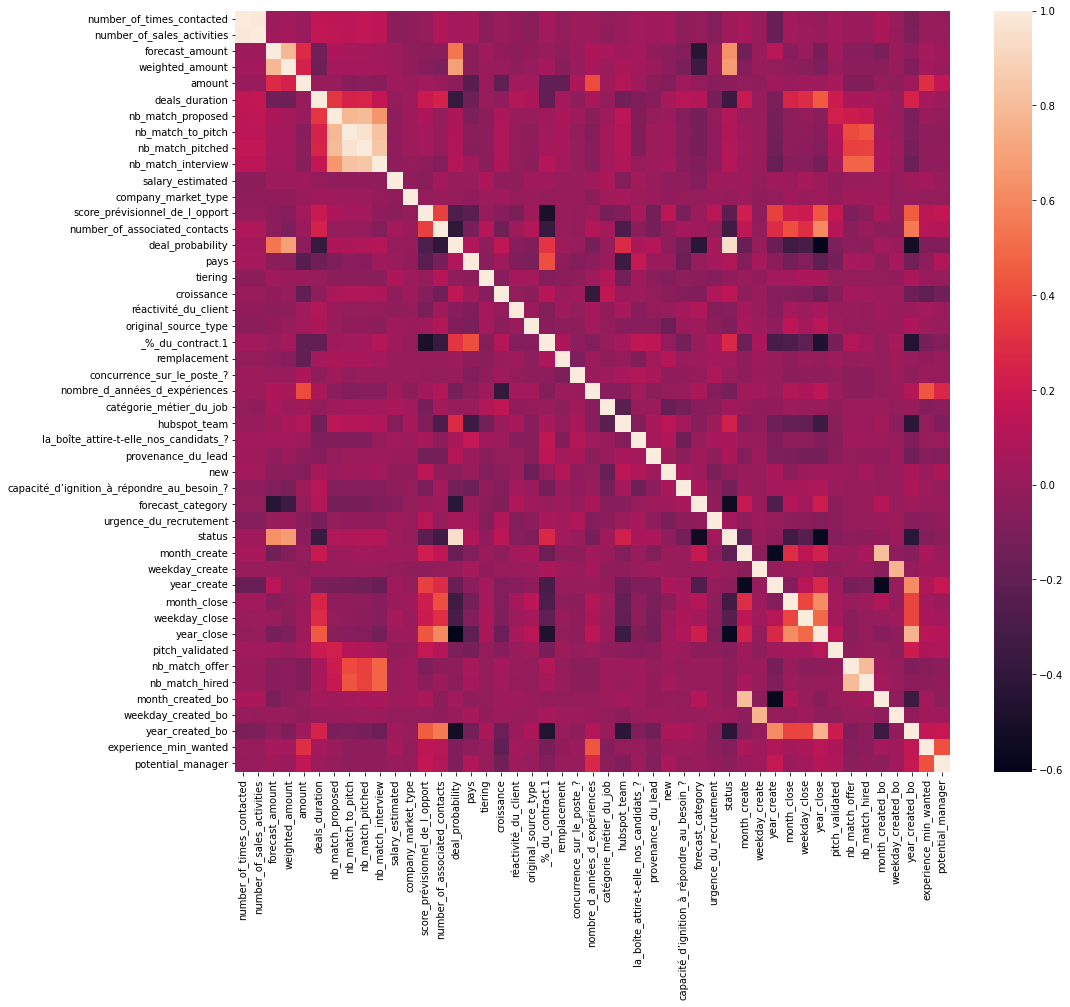

In [235]:
corr_matrix = df_for_prediction.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix)
plt.show()

In [236]:
df_multicoll = df_for_prediction[['amount', 'salary_estimated', 'number_of_times_contacted', 'number_of_sales_activities', 'forecast_amount', 'weighted_amount',
                                  'nb_match_proposed', 'nb_match_to_pitch', 'nb_match_pitched', 'nb_match_interview', 'status', 'deal_probability', 
                                  'nb_match_offer', 'nb_match_hired', 'pays','_%_du_contract.1', 'nombre_d_années_d_expériences', 'experience_min_wanted',
                                 'month_create', 'weekday_create', 'year_create','month_created_bo', 'weekday_created_bo', 'year_created_bo']]

In [237]:
corr_matrix_zoom = df_multicoll.corr()

#plt.figure(figsize=(16, 14))
#sns.heatmap(corr_matrix_zoom, annot = True)
#plt.show()

In [238]:
df_ready_for_pred = df_for_prediction.drop(['number_of_times_contacted', 'forecast_amount', 'deal_probability', 'nb_match_to_pitch',
                                           'nb_match_proposed', 'nb_match_hired', 'pays', 'nombre_d_années_d_expériences', 'month_created_bo',
                                           'year_created_bo', 'weekday_created_bo'], axis = 1)

df_ready_for_pred.shape

(3703, 36)

# Scaling and Transforming our Data

First we need to do the train/test split :

In [239]:
X = df_ready_for_pred.drop(['amount'],axis=1)
y = df_ready_for_pred['amount']

In [240]:
# let's proceed to the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then scale the variables :

In [76]:
# I choose to apply the StandardScaler :

# try with powertransformer

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train) 
#X_test_scaled = scaler.transform(X_test)

In [241]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [242]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns )
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns  )
display(X_train_scaled.head())
display(X_test_scaled.head())

,number_of_sales_activities,weighted_amount,deals_duration,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,experience_min_wanted,potential_manager
0,1.233532,1.104363,0.292472,0.299104,-1.624649,0.311808,0.349643,-1.017698,-1.436973,-0.782743,1.051347,1.674022,-0.282559,1.002028,-0.252101,-0.477891,1.866804,-1.219916,-1.042027,1.119236,-1.258562,0.538921,-0.465153,-0.434630,1.187517,-0.367393,0.063782,-2.775558e-16,-0.581177,-1.200554,0.489802,0.534406,-0.793018,-0.616166,-0.625775
1,-0.555762,1.236197,-1.511772,-1.933543,-1.624649,0.540358,1.199089,1.381887,0.346164,-0.272965,1.051347,-0.531575,-0.282559,1.002028,-0.252101,0.717633,0.614024,1.107866,0.883558,-1.879785,0.960260,-1.005428,-0.465153,0.969817,1.187517,-0.798704,-1.724346,6.106227e-16,-0.256206,-1.200554,0.490627,0.534406,-0.793018,0.641382,1.788287
2,-1.211651,0.897538,-1.537109,-1.933543,-1.624649,-0.435342,1.056958,0.709283,0.346164,2.144329,1.051347,-0.531575,-0.282559,1.002028,-0.252101,0.717633,0.614024,1.107866,-1.578819,-0.648507,0.960260,1.420484,-0.465153,0.969817,1.187517,0.002863,-0.777218,6.106227e-16,0.278835,-0.141352,0.490627,0.534406,-0.793018,-0.137388,-0.625775
3,-0.522015,-1.151225,0.625006,1.283646,-1.624649,-1.025261,-0.275481,1.097258,0.346164,-0.272965,1.051347,-0.531575,-0.282559,1.002028,-0.252101,0.717633,0.614024,-0.022100,-1.578819,-0.258408,-1.258562,-1.005428,0.724402,0.969817,-1.085503,0.621625,1.578000,-2.775558e-16,1.283035,0.471129,0.489802,0.534406,1.581996,-0.616166,-0.625775
4,0.229749,0.852787,-1.537768,-1.933543,-0.325344,3.899780,0.455829,-1.017698,-1.436973,-0.272965,1.051347,-0.531575,-0.282559,1.002028,-0.252101,-1.847885,0.614024,1.656222,0.883558,-0.258408,0.960260,0.538921,-0.465153,-0.434630,1.187517,-0.367393,0.063782,-2.775558e-16,-1.500373,-1.200554,-2.039676,-1.871235,-0.793018,-0.616166,-0.625775


,number_of_sales_activities,weighted_amount,deals_duration,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,experience_min_wanted,potential_manager
0,-0.703217,-1.151225,0.902456,0.650406,-0.779366,-0.299501,1.871774,0.709283,-1.436973,-0.272965,1.051347,2.092340,-0.282559,-0.997976,-0.252101,0.717633,0.867033,-0.609688,-1.578819,-0.258408,-1.258562,-1.005428,0.724402,0.969817,-1.085503,1.132383,-0.777218,-2.775558e-16,-0.973797,1.235375,0.490627,0.534406,0.615330,-0.616166,-0.625775
1,-0.764603,0.927470,-1.537768,-0.955385,-0.230382,-0.443754,-0.215266,-1.017698,-1.436973,-0.272965,0.647679,1.674022,-0.282559,1.002028,-0.252101,-0.477891,-0.675618,1.656222,-0.580129,0.624899,-0.853781,0.936146,-0.465153,-0.919969,1.187517,-0.367393,0.063782,-2.775558e-16,-1.500373,-1.200554,-2.039676,-1.871235,0.615330,-0.616166,-0.625775
2,0.844588,-1.151225,1.728530,-0.955385,0.362733,-0.121243,0.018236,0.709283,0.346164,2.144329,1.051347,-0.531575,-0.282559,1.002028,-0.252101,-1.847885,-2.033321,-0.609688,0.883558,-0.258408,0.960260,1.420484,0.724402,-1.544513,-1.085503,0.621625,-1.724346,-2.775558e-16,0.026234,1.235375,0.490627,0.534406,1.263499,-0.616166,-0.625775
3,0.221494,-1.151225,1.244405,1.870081,1.918166,-0.504064,-1.964004,0.709283,0.346164,-0.272965,-1.148533,-0.531575,-0.282559,1.002028,-0.252101,-1.847885,0.614024,0.549207,0.883558,-0.648507,0.960260,1.420484,0.724402,-1.544513,-1.085503,-0.367393,0.842516,-2.775558e-16,1.283035,-0.141352,0.489802,0.534406,-0.793018,-0.616166,-0.625775
4,0.042013,1.025748,-1.537768,-0.955385,0.938401,4.067736,-0.524880,-1.017698,-1.436973,0.717548,0.228922,1.674022,-0.282559,1.002028,-0.252101,-0.477891,0.231787,-0.022100,0.883558,-0.258408,0.017952,-0.054887,-0.465153,0.189448,1.187517,-0.367393,0.063782,-2.775558e-16,-1.500373,-1.200554,-2.039676,-1.871235,0.615330,-0.616166,-0.625775


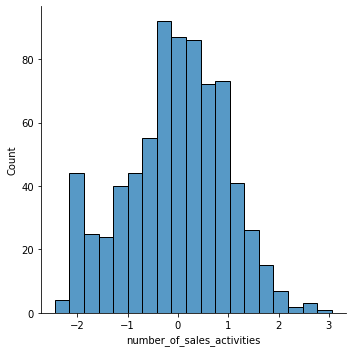

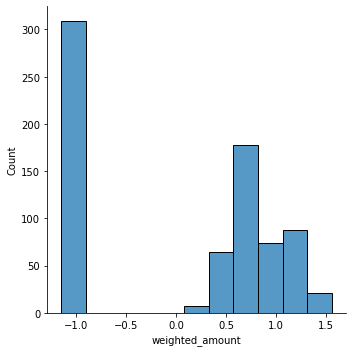

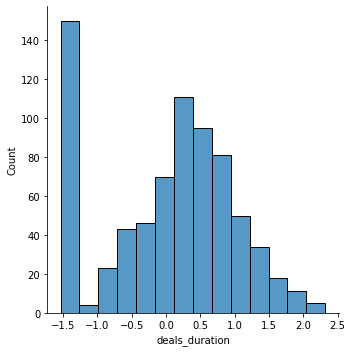

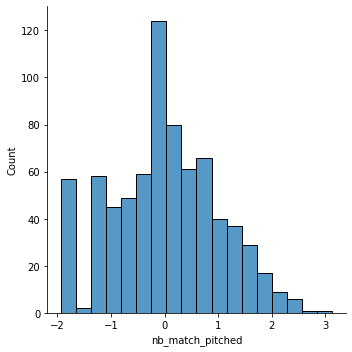

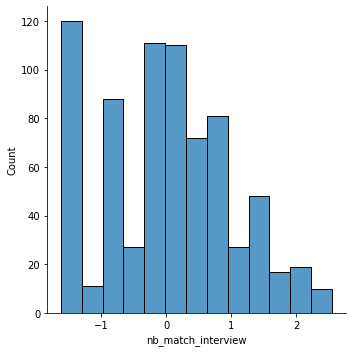

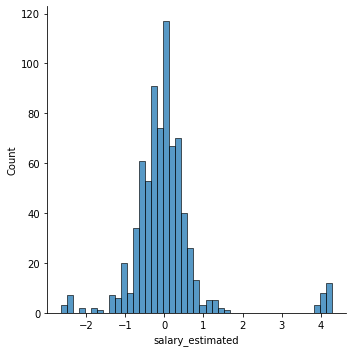

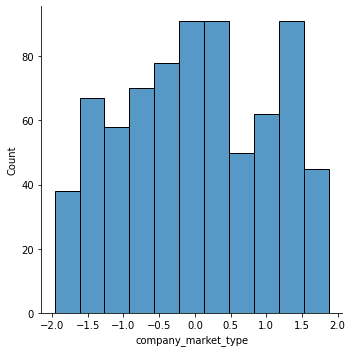

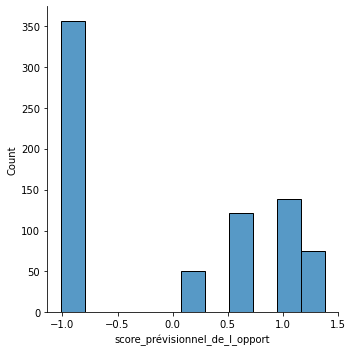

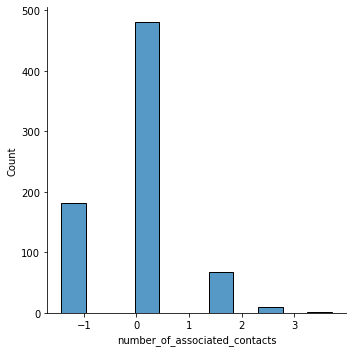

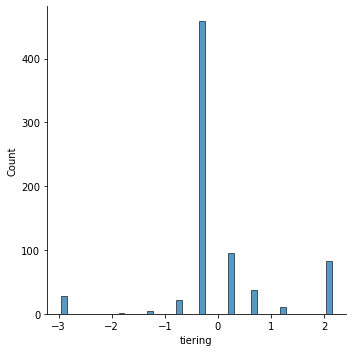

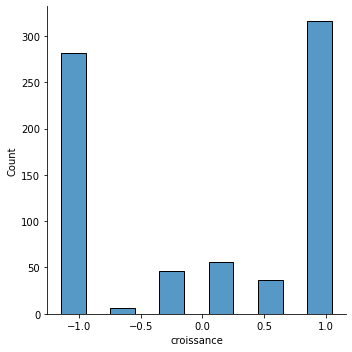

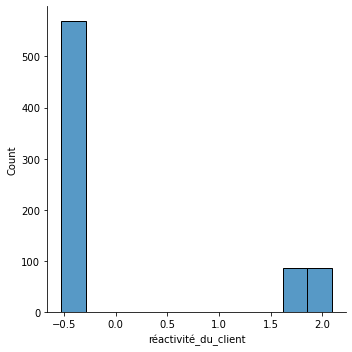

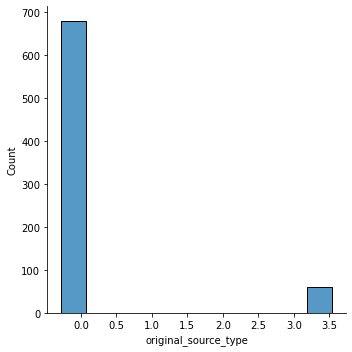

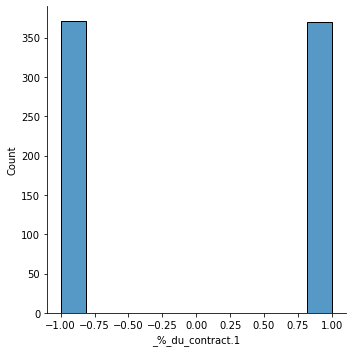

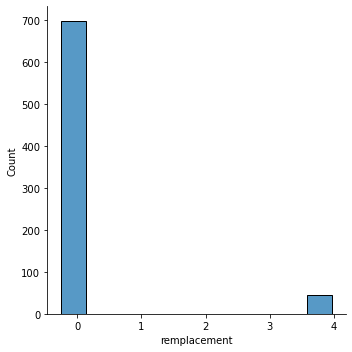

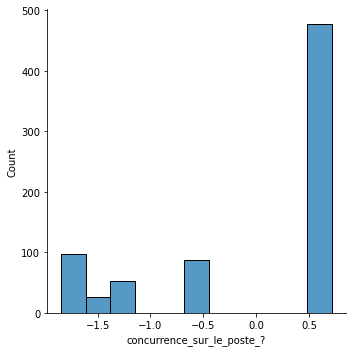

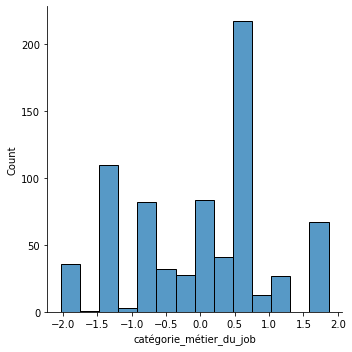

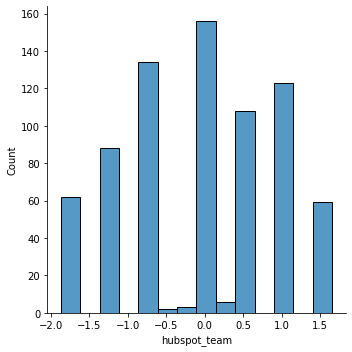

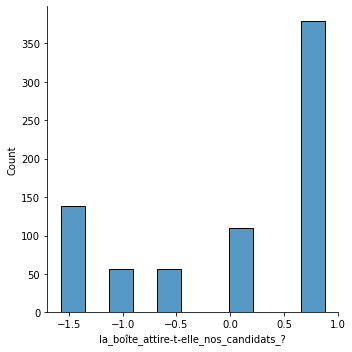

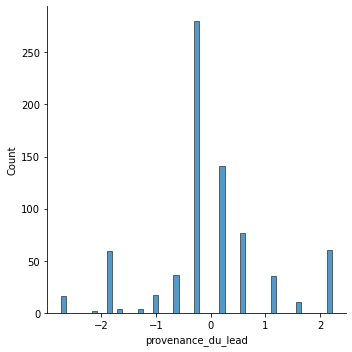

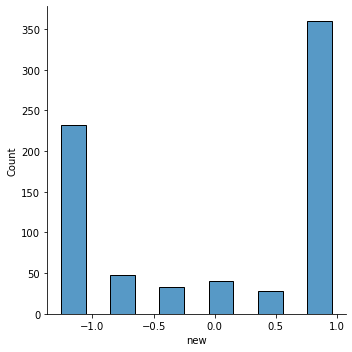

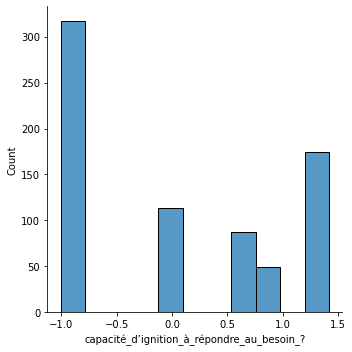

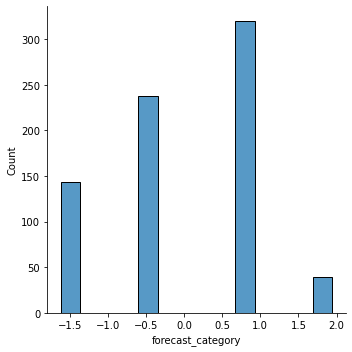

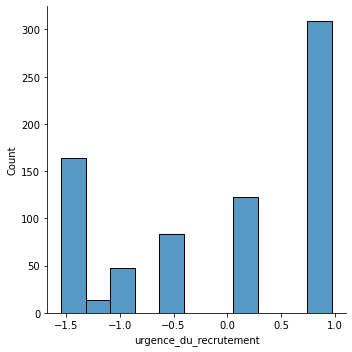

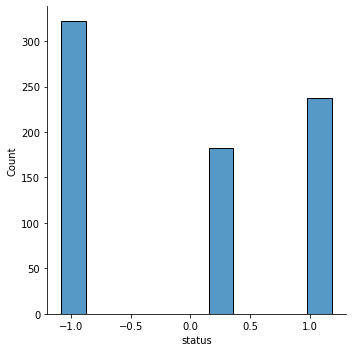

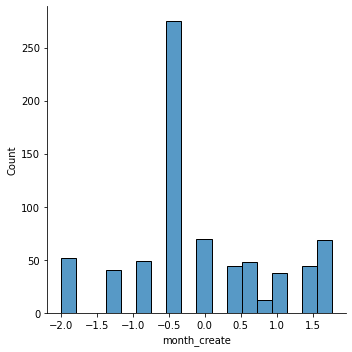

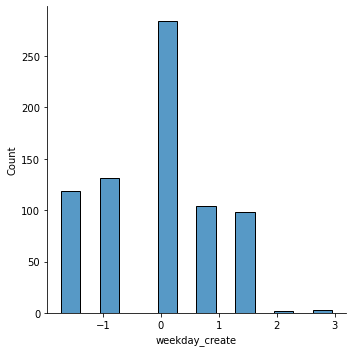

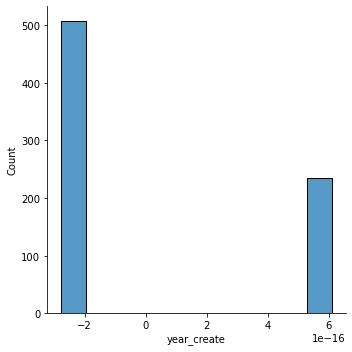

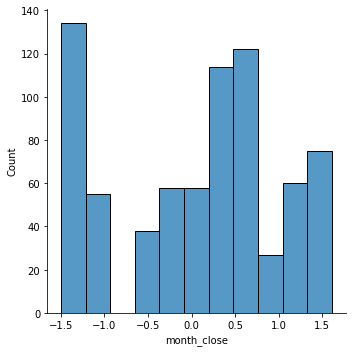

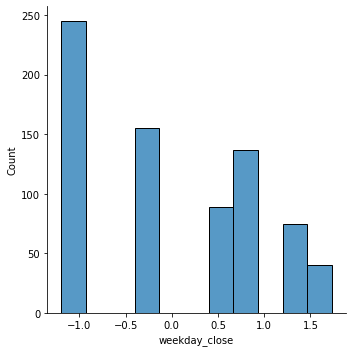

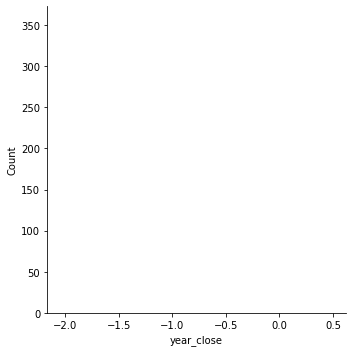

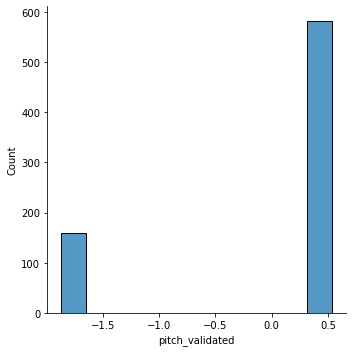

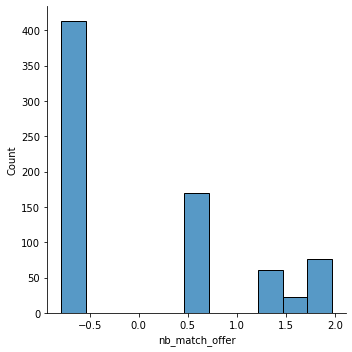

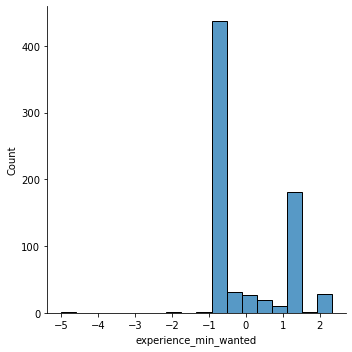

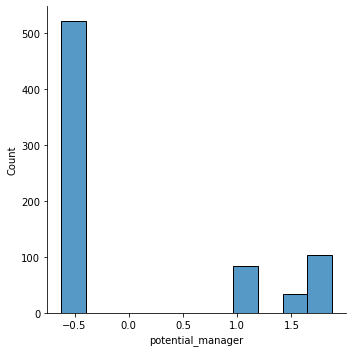

number_of_sales_activities                    None
weighted_amount                               None
deals_duration                                None
nb_match_pitched                              None
nb_match_interview                            None
salary_estimated                              None
company_market_type                           None
score_prévisionnel_de_l_opport                None
number_of_associated_contacts                 None
tiering                                       None
croissance                                    None
réactivité_du_client                          None
original_source_type                          None
_%_du_contract.1                              None
remplacement                                  None
concurrence_sur_le_poste_?                    None
catégorie_métier_du_job                       None
hubspot_team                                  None
la_boîte_attire-t-elle_nos_candidats_?        None
provenance_du_lead             

In [243]:
X_test_scaled.apply(plot_continuous)

# Building a predictive model for AMOUNT

Now that our variables are scaled, we can build the predictive model. We will do this with a function to be able to choose the best method and make vary the arguments

In [244]:
# let's first import the libraries we will need :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor # because we have numericals
from sklearn.neural_network import MLPRegressor

In [245]:
def test_functions(X_train, y_train, X_test, y_test) :
    
    lrm = LinearRegression().fit(X_train, y_train)
    y_pred_lrm_train = lrm.predict(X_train)
    print("R2 for train set with Linear Reg is :", r2_score(y_pred_lrm_train,y_train))
    y_pred_lrm_test = lrm.predict(X_test)
    print("R2 for test set with Linear Reg is :", r2_score(y_pred_lrm_test,y_test))
    print("MSE with Linear Reg is :", mean_squared_error(y_pred_lrm_test,y_test))
    
    print()
    
    knn_models = []  
    scores = []
    for k in range(2,20):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        knn_models.append(model)
        scores.append(model.score(X_test, y_test))
    for index,score in enumerate(scores):
        print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,20),scores,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    
    print()
    
    mlp = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred_mlp_train = mlp.predict(X_train)
    y_pred_mlp_test = mlp.predict(X_test)
    
    print("Score with MLP for train set is :", mlp.score(X_train, y_train))
    
    print("Score with MLP for test set is :", mlp.score(X_test, y_test))
    

R2 for train set with Linear Reg is : -0.7266509078792058
R2 for test set with Linear Reg is : -2.4323554173729605
MSE with Linear Reg is : 30022743.151343938

The R2 of the k-nn model with 2 neighbours on the TEST set was: 0.06
The R2 of the k-nn model with 3 neighbours on the TEST set was: 0.19
The R2 of the k-nn model with 4 neighbours on the TEST set was: 0.18
The R2 of the k-nn model with 5 neighbours on the TEST set was: 0.18
The R2 of the k-nn model with 6 neighbours on the TEST set was: 0.23
The R2 of the k-nn model with 7 neighbours on the TEST set was: 0.22
The R2 of the k-nn model with 8 neighbours on the TEST set was: 0.21
The R2 of the k-nn model with 9 neighbours on the TEST set was: 0.22
The R2 of the k-nn model with 10 neighbours on the TEST set was: 0.21
The R2 of the k-nn model with 11 neighbours on the TEST set was: 0.21
The R2 of the k-nn model with 12 neighbours on the TEST set was: 0.20
The R2 of the k-nn model with 13 neighbours on the TEST set was: 0.20
The R2 o

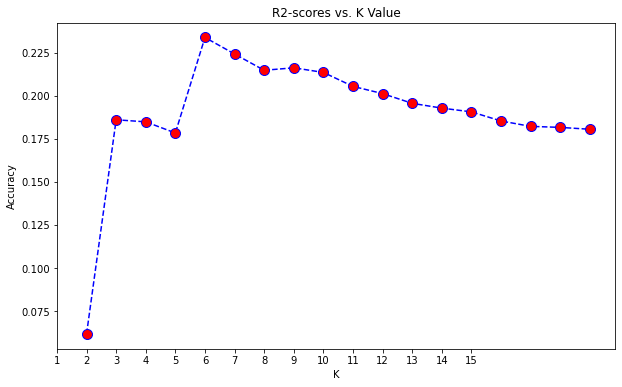

In [246]:
test_functions(X_train, y_train, X_test, y_test)